# read data

In [1]:
import scanpy as sc

In [2]:
ad = sc.read_h5ad('/Users/chrislangseth/work/karolinska_institutet/projects/ST-BRICHOS/data/combined_samples.h5ad')
ad.X = ad.X.toarray()
ad.X = ad.X.astype(int)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/chrislangseth/miniforge3/envs/TF_SONOMA/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/chrislangseth/miniforge3/envs/TF_SONOMA/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/chrislangseth/miniforge3/envs/TF_SONOMA/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' 

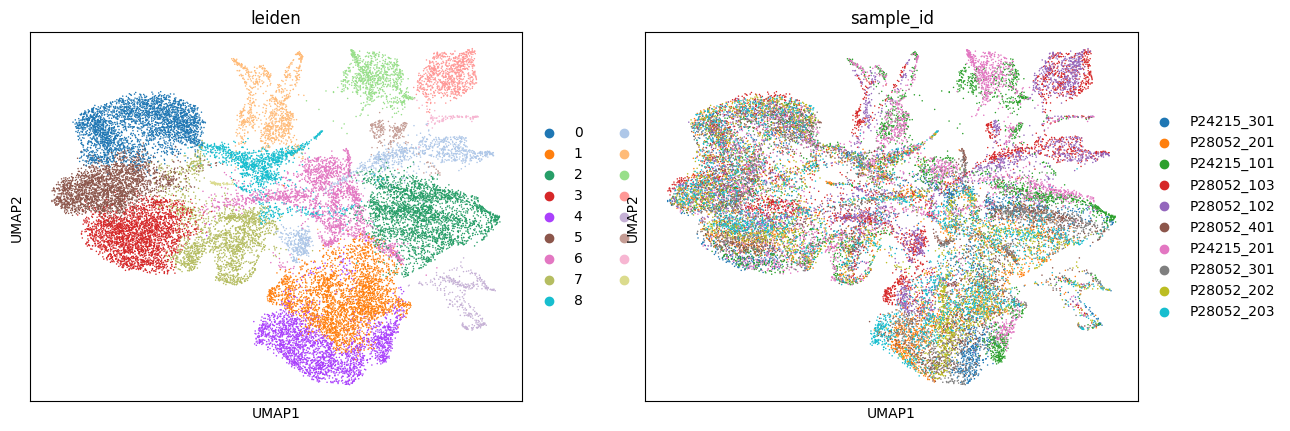

In [3]:
# Basic filtering (optional but can help speed)
sc.pp.filter_cells(ad, min_genes=200)
sc.pp.filter_genes(ad, min_cells=3)

# Normalize total counts per cell
sc.pp.normalize_total(ad, target_sum=1e4)

# Log1p transform
sc.pp.log1p(ad)

# Find highly variable genes (per batch = sample is recommended for spatial data)
#sc.pp.highly_variable_genes(ad, flavor="seurat_v3", batch_key="sample_id", n_top_genes=2000)

# Subset to HVGs
#ad = ad[:, ad.var.highly_variable]

# Scale
sc.pp.scale(ad, max_value=10)

# PCA
sc.tl.pca(ad, svd_solver='arpack')

# Neighborhood graph
sc.pp.neighbors(ad, n_neighbors=15, n_pcs=30)

# UMAP
sc.tl.umap(ad)

# Clustering
sc.tl.leiden(ad, resolution=0.5)  # You can adjust resolution

# Plot UMAP
sc.pl.umap(ad, color=["leiden", "sample_id"])

In [4]:
sample_groups = {
    "P24215_101": "WT",
    "P24215_201": "BRICHOS",
    "P24215_301": "BRICHOS",
    "P24215_401": "PBS",
    "P28052_102": "PBS",
    "P28052_103": "PBS",
    "P28052_201": "PBS",
    "P28052_202": "PBS",
    "P28052_203": "PBS",
    "P28052_301": "PBS",
    "P28052_401": "BRICHOS",
}

In [5]:
ad.obs['treatment'] = ad.obs.sample_id.map(sample_groups)

In [6]:
ad.write('../data/ST_BRICHOS.h5ad')